***
# **HMC Labs - Maps Analyzer** 

<img style="float: left; padding-right: 80px; padding-left: 5px;" src="img/logo_hmc.png" width="250px" align=”left” >

In the laboratory of **HMC maps** we will perform the following points:
   * Configure the libraries and the dependecies of the laboratory;
   * Read the configuration file of the laboratory;
   * Read the static datasets of terrain, river networks and outlet sections;
   * Read the dynamic datasets of the maps (forcing and outcome datasets);
   * Plot the maps of forcing variables;
   * Plot the maps of outcome variables.    


## **Import libraries and dependencies**

In [53]:
# Notebook configuration
%matplotlib inline
%matplotlib widget

# Noteboook extentions
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#from IPython.display import Image
#from IPython.core.display import HTML 

# Libraries
import os
import sys
from argparse import ArgumentParser

from library.common.lib_info_args import logger_name, logger_format
from library.common.lib_utils_logging import set_logging_file

from library.common.lib_data_io_json import read_file_settings
from library.common.lib_data_io_generic import define_file_path_analyzer, \
    filter_file_time, select_file_time, define_file_time, define_file_map, define_file_variables, \
    create_darray_map, \
    get_path_root, get_path_home, set_info_mode

from library.common.lib_data_geo_ascii import read_data_grid
from library.common.lib_data_geo_shapefile import read_data_section

from library.common.lib_data_io_netcdf import read_file_map

from library.common.lib_graph_map import plot_map_var

from library.common.lib_utils_time import create_time_range

# Define configuration file
file_name_settings="fp_labs_analyzer_hmc_maps.json"

# Info
print(' ==> Libraries loaded')

 ==> Libraries loaded



### **Configure the flood-proofs laboratory**
- Load the configuration file:

In [54]:
# Read data from settings algorithm file
obj_settings = read_file_settings(file_name_settings)

# Info
print(' ==> Settings information loaded')

 ==> Settings information loaded


- Define objects:

In [55]:
# Define objects
obj_generic = obj_settings['generic']
obj_variables_forcing = obj_settings['variables']['forcing']
obj_variables_results = obj_settings['variables']['results']
obj_template_path = obj_settings['template']['path']
obj_template_geo = obj_settings['template']['geo']
obj_template_var = obj_settings['template']['variable']
obj_template_time = obj_settings['template']['time']
obj_data_static = obj_settings['data']['static']
obj_data_dynamic_source = obj_settings['data']['dynamic']['source']
obj_data_dynamic_destination = obj_settings['data']['dynamic']['destination']

info_mode, info_domain_name = set_info_mode(obj_settings['generic'], tag_type='maps')

info_time_analysis = obj_settings['case_study']['time_analysis']
info_time_start = obj_settings['case_study']['time_start']
info_time_end = obj_settings['case_study']['time_end']
info_time_period_left = obj_settings['case_study']['time_period_left']
info_time_period_right = obj_settings['case_study']['time_period_right']
info_description_analysis = obj_settings['case_study']['description']

# Define analysis time range
info_time_db_analysis_period, info_time_str_analysis_period = create_time_range(
    time_analysis=info_time_analysis, time_start=info_time_start, time_end=info_time_end,
    time_analysis_left_period=info_time_period_left, time_analysis_right_period=info_time_period_right)

 INFO --> Time period is defined from "2022-11-18 11:00" to "2022-11-16 14:00"


- Define path(s)

In [56]:
# Define static and dynamic path root
file_path_home = get_path_home(obj_generic['path_home'])
file_path_root_static = get_path_root(obj_generic['path_root_data_static'], home_path_string=file_path_home)
file_path_root_dynamic_source = get_path_root(
    obj_generic['path_root_data_dynamic_source'], home_path_string=file_path_home)
file_path_root_dynamic_destination = get_path_root(
    obj_generic['path_root_data_dynamic_destination'], home_path_string=file_path_home)

### **Organize and read the static datasets**
- Organize the static datasets:

In [57]:
# Define file static path(s)
obj_filled_path = dict.fromkeys(list(obj_template_path.keys()), file_path_root_static)
file_path_dset_static = define_file_path_analyzer(
    obj_data_static, path_template_raw=obj_template_path, path_template_values=obj_filled_path,
    tag_file_time=None)[0]

- Read the static datasets:

In [58]:
# Read terrain datasets
darray_terrain = read_data_grid(file_path_dset_static['terrain'], var_limit_min=0, var_limit_max=None)
# Read river network datasets
darray_river_network = read_data_grid(file_path_dset_static['river_network'], var_limit_min=0, var_limit_max=1)
# Read sections shapefile
dframe_section = read_data_section(file_path_dset_static['sections'])

In [59]:
# Create geographical object
obj_filled_geo = {'domain_name': info_domain_name}

# Define variables
run_variables_forcing = define_file_variables(obj_variables_forcing, obj_filled_geo)
run_variables_results = define_file_variables(obj_variables_results, obj_filled_geo)

### **Organize and read the dynamic datasets**
- Organize the dynamic datasets:

In [60]:
# Fill dynamic file path(s)
obj_filled_path = dict.fromkeys(list(obj_template_path.keys()), file_path_root_dynamic_source)

In [61]:
# Get time db and reference
info_time_db_dynamic_source_generic, info_time_ref_dynamic_source_generic = define_file_time(
    obj_data_dynamic_source,
    time_format_path='%Y%m%d',
    geo_template_raw=obj_template_path, geo_template_values=obj_filled_geo,
    time_template_raw=obj_template_time, time_template_values=None,
    path_template_raw=obj_template_path, path_template_values=obj_filled_path)

# Filter time according to the analysis period (routine for interactive mode)
info_time_db_dynamic_source_filtered, info_time_list_dynamic_source_filtered = filter_file_time(
    info_time_db_dynamic_source_generic, info_time_db_analysis_period)

# Select time analysis (routine for cmd mode)
info_time_dynamic_source_selected = select_file_time(
    info_time_db_dynamic_source_generic, info_time_ref_dynamic_source_generic,
    time_pivot='reference', time_value=None, time_random=True)

In [62]:
# Define dynamic source folder(s)
file_path_dynamic_source = define_file_path_analyzer(
    obj_data_dynamic_source, tag_file_time='time_reference',
    geo_template_raw=obj_template_path, geo_template_values=obj_filled_geo,
    time_template_raw=obj_template_time, time_template_values={'time_reference': info_time_analysis},
    path_template_raw=obj_template_path, path_template_values=obj_filled_path)[0]

In [63]:
# Define dynamic destination folder(s)
obj_filled_path = dict.fromkeys(list(obj_template_path.keys()), file_path_root_dynamic_destination)
file_path_dset_dynamic_destination, file_act_dset_dynamic_destination = define_file_path_analyzer(
    obj_data_dynamic_destination, tag_file_time='time_reference',
    geo_template_raw=obj_template_geo, geo_template_values=obj_filled_geo,
    time_template_raw=obj_template_time, time_template_values={'time_reference': info_time_analysis},
    path_template_raw=obj_template_path, path_template_values=obj_filled_path)

- Read the dynamic datasets:

In [64]:
# Read forcing datasets map
obj_maps_dynamic_forcing = read_file_map(
    file_path_dynamic_source['maps_forcing'], info_time_dynamic_source_selected['maps_forcing'],
    file_vars_expected=run_variables_forcing)

In [65]:
# Read results datasets map
obj_maps_dynamic_results = read_file_map(
    file_path_dynamic_source['maps_results'], info_time_dynamic_source_selected['maps_results'],
    file_vars_expected=run_variables_results)

- Extract the dynamic variable(s):

In [66]:
# Extract variables from forcing datasets
darray_map_rain, attrs_map_rain = create_darray_map(
    obj_maps_dynamic_forcing, var_name_in='Rain', var_name_out='rain')
darray_map_airt, attrs_map_airt = create_darray_map(
    obj_maps_dynamic_forcing, var_name_in='Air_Temperature', var_name_out='air_temperature')
darray_map_rh, attrs_map_rh = create_darray_map(
    obj_maps_dynamic_forcing, var_name_in='Relative_Humidity', var_name_out='relative_humidity')

# Extract variables from results datasets
darray_map_sm, attrs_map_sm = create_darray_map(
    obj_maps_dynamic_results,  var_name_in='SM', var_name_out='soil_moisture')
darray_map_lst, attrs_map_lst = create_darray_map(
    obj_maps_dynamic_results, var_name_in='LST', var_name_out='land_surface_temperature')

### **Plot the dynamic datasets in maps format**
- Create the plot of the **soil moisture map**:

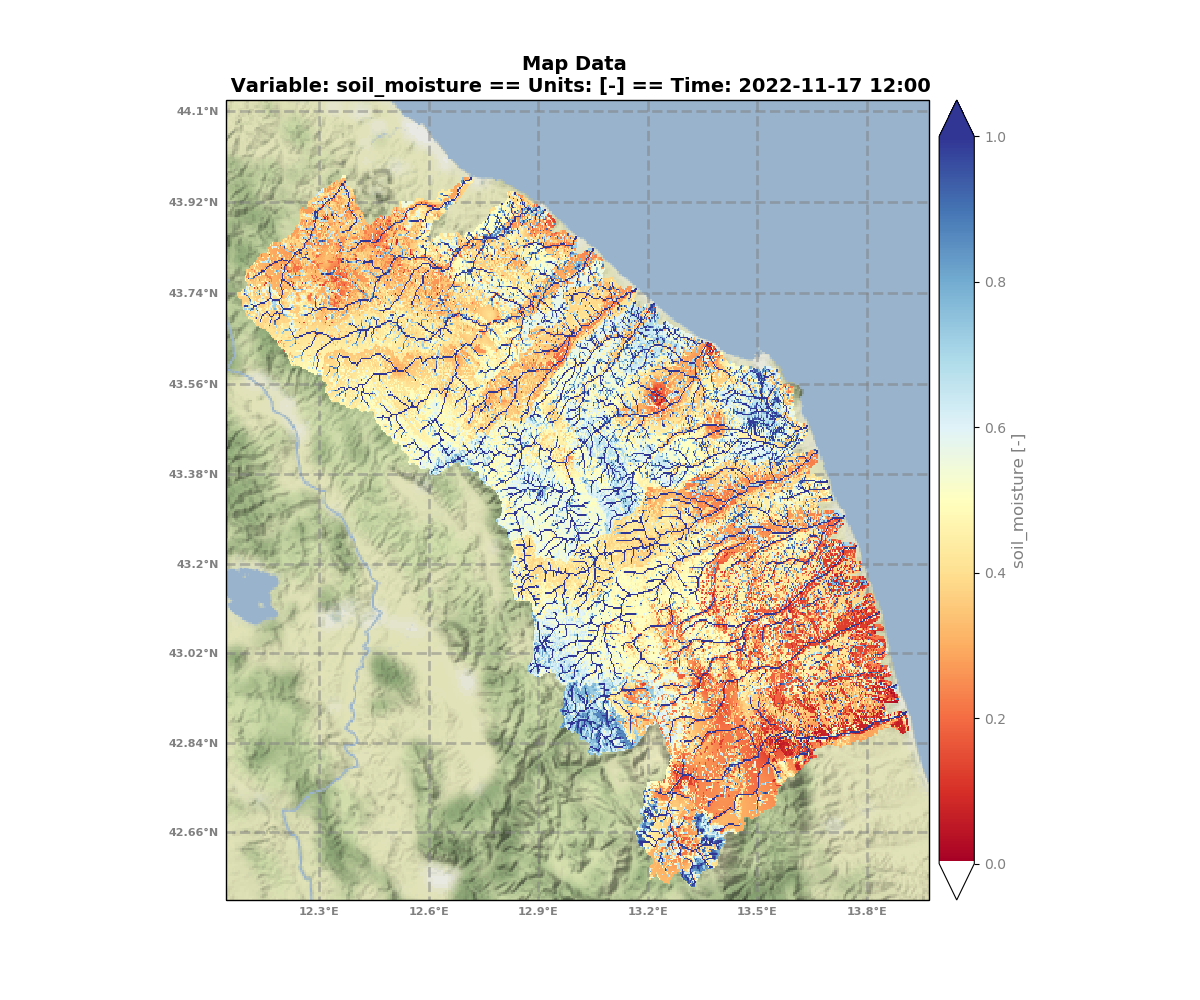

In [67]:
# Plot map soil moisture
file_name_map_sm = define_file_map(
    file_path_dset_dynamic_destination['maps_results'], var_name='soil_moisture')
plot_map_var(file_name_map_sm, darray_map_sm, info_time_analysis,
             var_name_data='soil_moisture', var_units='[-]',
             var_name_geo_x='Longitude', var_name_geo_y='Latitude',
             var_limit_min=0, var_limit_max=1)

- Create the plot of the **air temperature map**:

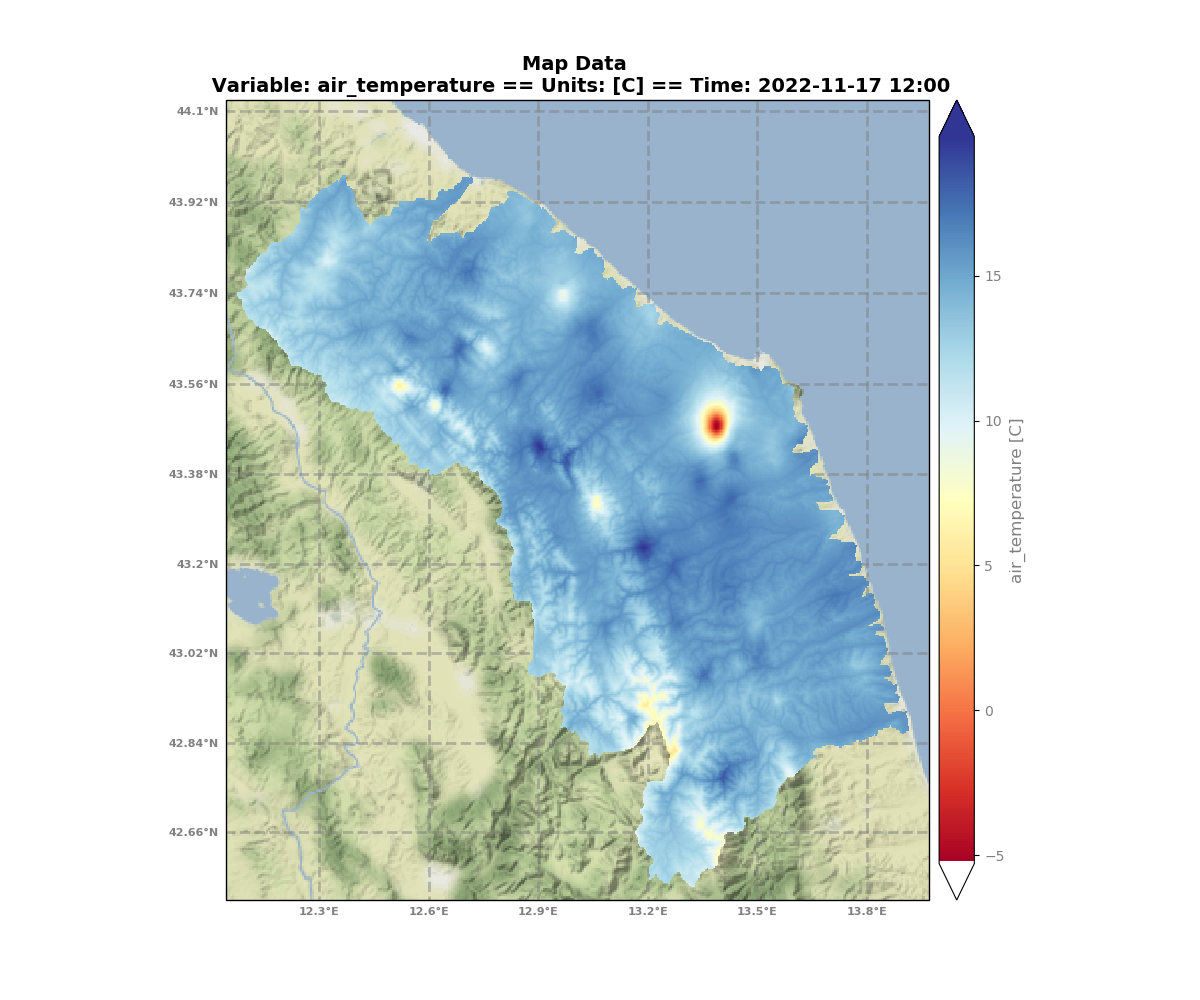

In [68]:
# Plot map air temperature
file_name_map_airt = define_file_map(
    file_path_dset_dynamic_destination['maps_forcing'], var_name='air_temperature')

plot_map_var(file_name_map_airt, darray_map_airt, info_time_analysis,
             var_name_data='air_temperature', var_units='[C]',
             var_name_geo_x='longitude', var_name_geo_y='latitude')

**Training on-the-job**
- Download/Organize the static and dynamic datasets for a different "time run";
- Select a different case-study (time run);
- Select a different analysis step (time analysis);
- Add/change the variables in the maps plot (have to check the names of the variables in the netcdf forcing or outcome files);
- Add/change the plot of gridded variables (for example using a different map background);
- ...